In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import regex as re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from torch.utils.data import DataLoader,Dataset
import torch 
import torch.nn as nn 
import torch.nn.functional as F
from torch import optim
import time

warnings.filterwarnings('ignore')

In [2]:
url = "Fake.csv"
data_Fake = pd.read_csv(url)
data_Fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [3]:
url = "True.csv"
data_True = pd.read_csv(url)
data_True

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
data_Fake['fake'] = 1
data_True['fake'] = 0

In [5]:
df_news = pd.concat([data_Fake, data_True])
df_news

,title,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


## 1) EDA

1    0.522985
0    0.477015
Name: fake, dtype: float64

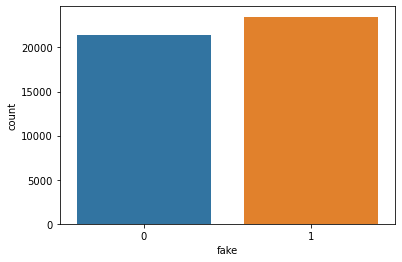

In [6]:
# Explore the target variable
sns.countplot(x='fake', data=df_news)
df_news["fake"].value_counts()/df_news.shape[0]

In [7]:
df_news['date'] = pd.to_datetime(df_news['date'], errors='coerce') # If 'coerce', then invalid parsing will be set as NaT.
df_news['Year'] = df_news['date'].dt.year
df_news['Month'] = df_news['date'].dt.month

<AxesSubplot:xlabel='Year', ylabel='count'>

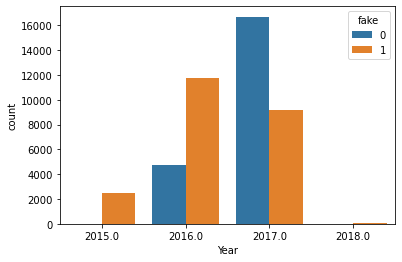

In [8]:
sns.countplot(x='Year', data=df_news, hue='fake')

<AxesSubplot:xlabel='Month', ylabel='count'>

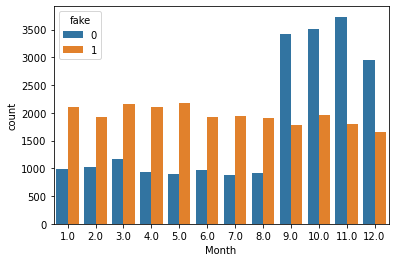

In [9]:
sns.countplot(x='Month', data=df_news, hue='fake')

In [10]:
df_news['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

## 2) Classic ML

In [11]:
df_news

,title,text,subject,date,fake,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,2017.0,12.0
...,...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,0,2017.0,8.0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,0,2017.0,8.0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,0,2017.0,8.0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,0,2017.0,8.0


In [12]:
df_news = df_news.drop(['subject','date','Year','Month','title'],axis = 1)
df_news

,text,fake
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",0
21414,MINSK (Reuters) - In the shadow of disused Sov...,0
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [13]:
df_news = df_news.reset_index(drop = True)

In [14]:
df_news['text'] = df_news['text'].str.lower()
df_news['text'] = df_news['text'].str.replace('[\.\,]',' ')
df_news.head()

,text,fake
0,donald trump just couldn t wish all americans ...,1
1,house intelligence committee chairman devin nu...,1
2,on friday it was revealed that former milwauk...,1
3,on christmas day donald trump announced that ...,1
4,pope francis used his annual christmas day mes...,1


In [15]:
new_sentence = []
for sentence in df_news['text']:
    norm_sentence = sentence.lower() # removing capital letters
    norm_sentence = re.sub(r'\d+','', norm_sentence) # \d+ removing one or more digits [0-9]
    norm_sentence = re.sub(r'[^\w\s]','', norm_sentence) # removing all characters that are not alphaNumeric oder whitespace e.g. tab or space
    norm_sentence = re.sub(r'https.*?','', norm_sentence)
    norm_sentence = norm_sentence.strip()
    new_sentence.append(norm_sentence)
df_news['New_Text'] = new_sentence # adding new column with the standardized message
df_news.head()

,text,fake,New_Text
0,donald trump just couldn t wish all americans ...,1,donald trump just couldn t wish all americans ...
1,house intelligence committee chairman devin nu...,1,house intelligence committee chairman devin nu...
2,on friday it was revealed that former milwauk...,1,on friday it was revealed that former milwauk...
3,on christmas day donald trump announced that ...,1,on christmas day donald trump announced that ...
4,pope francis used his annual christmas day mes...,1,pope francis used his annual christmas day mes...


In [16]:
df_news.loc[3,'New_Text']

'on christmas day  donald trump announced that he would  be back to work  the following day  but he is golfing for the fourth day in a row  the former reality show star blasted former president barack obama for playing golf and now trump is on track to outpace the number of golf games his predecessor played updated my tracker of trump s appearances at trump properties  rounds of golf including today s  at this pace  he ll pass obama s firstterm total by july  next year  t cofgvacxrtj pic twitter comgemcjqtbh  philip bump pbump december    that makes what a washington post reporter discovered on trump s website really weird  but everything about this administration is bizarre af  the coding contained a reference to obama and golf  unlike obama  we are working to fix the problem   and not on the golf course   however  the coding wasn t done correctly the website of donald trump  who has spent several days in a row at the golf course  is coded to serve up the following message in the even

In [17]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [18]:
from tqdm import tqdm
p_1 = []
for index,word in tqdm((df_news.iterrows())):
    p_1 +=[morph.parse(word['New_Text'])[0].normal_form]
df_news['text_morph'] = p_1
df_news

44898it [00:17, 2540.08it/s]


,text,fake,New_Text,text_morph
0,donald trump just couldn t wish all americans ...,1,donald trump just couldn t wish all americans ...,donald trump just couldn t wish all americans ...
1,house intelligence committee chairman devin nu...,1,house intelligence committee chairman devin nu...,house intelligence committee chairman devin nu...
2,on friday it was revealed that former milwauk...,1,on friday it was revealed that former milwauk...,on friday it was revealed that former milwauk...
3,on christmas day donald trump announced that ...,1,on christmas day donald trump announced that ...,on christmas day donald trump announced that ...
4,pope francis used his annual christmas day mes...,1,pope francis used his annual christmas day mes...,pope francis used his annual christmas day mes...
...,...,...,...,...
44893,brussels (reuters) - nato allies on tuesday we...,0,brussels reuters nato allies on tuesday welco...,brussels reuters nato allies on tuesday welco...
44894,london (reuters) - lexisnexis a provider of l...,0,london reuters lexisnexis a provider of lega...,london reuters lexisnexis a provider of lega...
44895,minsk (reuters) - in the shadow of disused sov...,0,minsk reuters in the shadow of disused soviet...,minsk reuters in the shadow of disused soviet...
44896,moscow (reuters) - vatican secretary of state ...,0,moscow reuters vatican secretary of state car...,moscow reuters vatican secretary of state car...


In [19]:
df_news_1 = df_news[['text_morph','fake']]
df_news_1

,text_morph,fake
0,donald trump just couldn t wish all americans ...,1
1,house intelligence committee chairman devin nu...,1
2,on friday it was revealed that former milwauk...,1
3,on christmas day donald trump announced that ...,1
4,pope francis used his annual christmas day mes...,1
...,...,...
44893,brussels reuters nato allies on tuesday welco...,0
44894,london reuters lexisnexis a provider of lega...,0
44895,minsk reuters in the shadow of disused soviet...,0
44896,moscow reuters vatican secretary of state car...,0


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer = TfidfVectorizer(input='content', min_df=0.001, max_df=0.9)
tfidf_wm = vectorizer.fit_transform(df_news_1['text_morph'])
tfidf_tokens = vectorizer.get_feature_names()

In [22]:
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
df_tfidfvect

,aapl,aaron,abadi,abandon,abandoned,abandoning,abbas,abbott,abc,abcs,...,zimmerman,zinke,zionist,zip,zippers,zone,zones,zuckerberg,zuma,zurich
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.046874,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44894,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44895,0.0,0.000000,0.0,0.0,0.082514,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44896,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=300)
pca.fit(df_tfidfvect)
tf_idf_pca = pca.transform(df_tfidfvect)

tf_idf_pca = pd.DataFrame(tf_idf_pca, index=df_tfidfvect.index)
tf_idf_pca.columns = list(map(lambda x: 'tf_idf_pca_' + str(x), tf_idf_pca.columns))
print(tf_idf_pca.head())

   tf_idf_pca_0  tf_idf_pca_1  tf_idf_pca_2  tf_idf_pca_3  tf_idf_pca_4  \
0      0.137876     -0.035386      0.054531     -0.052131     -0.102878   
1      0.056431      0.061844     -0.045294     -0.122178      0.051644   
2      0.063288     -0.135439      0.065067     -0.034918     -0.057817   
3      0.145519      0.001860      0.038772     -0.075417     -0.092918   
4      0.029921     -0.031815      0.067956      0.069046     -0.018429   

   tf_idf_pca_5  tf_idf_pca_6  tf_idf_pca_7  tf_idf_pca_8  tf_idf_pca_9  ...  \
0      0.000864      0.027966      0.007085     -0.002105     -0.000975  ...   
1     -0.063555     -0.068128      0.041893     -0.003211      0.047744  ...   
2     -0.022332     -0.057283     -0.007892      0.026238      0.011913  ...   
3     -0.000832      0.003000      0.022514     -0.008382     -0.002629  ...   
4     -0.042936      0.024618     -0.000012     -0.024412     -0.020157  ...   

   tf_idf_pca_290  tf_idf_pca_291  tf_idf_pca_292  tf_idf_pca_293  \

In [25]:
tf_idf_pca['fake'] = df_news_1['fake']
tf_idf_pca.head()

,tf_idf_pca_0,tf_idf_pca_1,tf_idf_pca_2,tf_idf_pca_3,tf_idf_pca_4,tf_idf_pca_5,tf_idf_pca_6,tf_idf_pca_7,tf_idf_pca_8,tf_idf_pca_9,...,tf_idf_pca_291,tf_idf_pca_292,tf_idf_pca_293,tf_idf_pca_294,tf_idf_pca_295,tf_idf_pca_296,tf_idf_pca_297,tf_idf_pca_298,tf_idf_pca_299,fake
0,0.137876,-0.035386,0.054531,-0.052131,-0.102878,0.000864,0.027966,0.007085,-0.002105,-0.000975,...,0.023450,-0.003544,0.000371,-2.415582e-02,0.005146,0.001372,-0.013633,0.026940,0.036527,1
1,0.056431,0.061844,-0.045294,-0.122178,0.051644,-0.063555,-0.068128,0.041893,-0.003211,0.047744,...,0.002472,-0.007574,0.023025,2.134191e-02,0.003021,-0.004650,-0.019130,-0.017171,-0.010692,1
2,0.063288,-0.135439,0.065067,-0.034918,-0.057817,-0.022332,-0.057283,-0.007892,0.026238,0.011913,...,0.035917,0.014561,-0.010095,-7.278466e-07,0.028618,0.026617,-0.044061,0.043363,0.011167,1
3,0.145519,0.001860,0.038772,-0.075417,-0.092918,-0.000832,0.003000,0.022514,-0.008382,-0.002629,...,0.003255,0.005795,-0.026066,-6.876307e-03,0.017512,-0.013786,-0.005928,0.024057,0.010054,1
4,0.029921,-0.031815,0.067956,0.069046,-0.018429,-0.042936,0.024618,-0.000012,-0.024412,-0.020157,...,0.013845,-0.011560,-0.010626,-9.849313e-04,-0.017407,-0.020710,-0.012985,-0.003945,-0.014880,1


In [26]:
from sklearn import model_selection, ensemble,linear_model, metrics
from sklearn.model_selection import train_test_split

In [27]:
%%time
X = tf_idf_pca.drop(['fake'], axis=1)
y = tf_idf_pca['fake']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
cval_score = model_selection.cross_validate(linear_model.RidgeClassifier(), X_train, Y_train,
                                          scoring = ["precision",'recall',"roc_auc"],return_train_score=True,cv = 10)

Wall time: 2.22 s


In [28]:
ridge=linear_model.RidgeClassifier()
ridge.fit(X_train,Y_train)
Y_train_pr=ridge.predict(X_train)
Y_test_pr=ridge.predict(X_test)

In [29]:
print("RidgeClassifier кросс-валидация train: \troc_auc:{:.2}\tprecision:{:.2}\trecall:{:.2}".format(np.mean(cval_score['train_roc_auc']),
                                                                                  np.mean(cval_score['train_precision']),
                                                                                  np.mean(cval_score['train_recall'])))
print("RidgeClassifier кросс-валидация test: \troc_auc:{:.2}\tprecision:{:.2}\trecall:{:.2}".format(np.mean(cval_score['test_roc_auc']),
                                                                                  np.mean(cval_score['test_precision']),
                                                                                  np.mean(cval_score['test_recall'])))
print("RidgeClassifier обучающая выборка: \troc_auc:{:.2}\tprecision:{:.2}\trecall:{:.2}".format(metrics.roc_auc_score(Y_train,Y_train_pr),
                                                                                             metrics.precision_score(Y_train,Y_train_pr),
                                                                                             metrics.recall_score(Y_train,Y_train_pr)))
print("RidgeClassifier тестовая выборка: \troc_auc:{:.2}\tprecision:{:.2}\trecall:{:.2}".format(metrics.roc_auc_score(Y_test,Y_test_pr),
                                                                                             metrics.precision_score(Y_test,Y_test_pr),
                                                                                             metrics.recall_score(Y_test,Y_test_pr)))

RidgeClassifier кросс-валидация train: 	roc_auc:1.0	precision:0.99	recall:0.98
RidgeClassifier кросс-валидация test: 	roc_auc:1.0	precision:0.99	recall:0.98
RidgeClassifier обучающая выборка: 	roc_auc:0.98	precision:0.99	recall:0.98
RidgeClassifier тестовая выборка: 	roc_auc:0.98	precision:0.99	recall:0.98


In [30]:
import matplotlib.pyplot as plt 

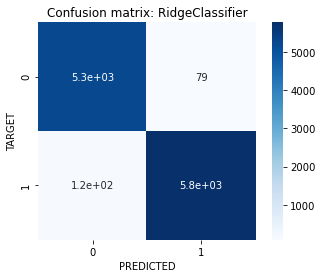

In [31]:
sns.heatmap(metrics.confusion_matrix(Y_test,Y_test_pr),annot=True,cmap="Blues",square=True)
plt.ylabel("TARGET")
plt.xlabel("PREDICTED")
plt.title("Confusion matrix: RidgeClassifier")
plt.show()

In [32]:
%%time
cval_score = model_selection.cross_validate(ensemble.RandomForestClassifier(n_estimators=50),  X_train, Y_train,
                                          scoring = ["precision",'recall',"roc_auc"],return_train_score=True,cv = 10)

Wall time: 3min 24s


In [33]:
fr=ensemble.RandomForestClassifier(n_estimators=50)
fr.fit(X_train,Y_train)
Y_train_pr=fr.predict(X_train)
Y_test_pr=fr.predict(X_test)

In [34]:
print("RandomForestClassifier кросс-валидация train: \troc_auc:{:.2}\tprecision:{:.2}\trecall:{:.2}".format(np.mean(cval_score['train_roc_auc']),
                                                                                  np.mean(cval_score['train_precision']),
                                                                                  np.mean(cval_score['train_recall'])))
print("RandomForestClassifier кросс-валидация test: \troc_auc:{:.2}\tprecision:{:.2}\trecall:{:.2}".format(np.mean(cval_score['test_roc_auc']),
                                                                                  np.mean(cval_score['test_precision']),
                                                                                  np.mean(cval_score['test_recall'])))
print("RandomForestClassifier обучающая выборка: \troc_auc:{:.2}\tprecision:{:.2}\trecall:{:.2}".format(metrics.roc_auc_score(Y_train,Y_train_pr),
                                                                                             metrics.precision_score(Y_train,Y_train_pr),
                                                                                             metrics.recall_score(Y_train,Y_train_pr)))
print("RandomForestClassifier тестовая выборка: \troc_auc:{:.2}\tprecision:{:.2}\trecall:{:.2}".format(metrics.roc_auc_score(Y_test,Y_test_pr),
                                                                                             metrics.precision_score(Y_test,Y_test_pr),
                                                                                             metrics.recall_score(Y_test,Y_test_pr)))

RandomForestClassifier кросс-валидация train: 	roc_auc:1.0	precision:1.0	recall:1.0
RandomForestClassifier кросс-валидация test: 	roc_auc:0.99	precision:0.97	recall:0.96
RandomForestClassifier обучающая выборка: 	roc_auc:1.0	precision:1.0	recall:1.0
RandomForestClassifier тестовая выборка: 	roc_auc:0.96	precision:0.97	recall:0.96


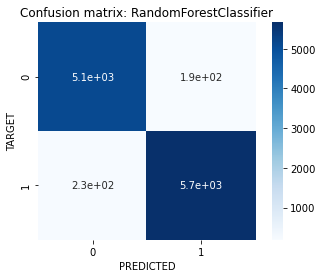

In [35]:
sns.heatmap(metrics.confusion_matrix(Y_test,Y_test_pr),annot=True,cmap="Blues",square=True)
plt.ylabel("TARGET")
plt.xlabel("PREDICTED")
plt.title("Confusion matrix: RandomForestClassifier")
plt.show()

## 3) 2NN

### CNN

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_news['text_morph'], df_news['fake'],test_size=0.2)

In [37]:
tokenizer = Tokenizer(num_words=10000) 
tokenizer.fit_on_texts(df_news['text_morph'])
train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)
x_train = pad_sequences(train_seq, maxlen=100)
x_test = pad_sequences(test_seq, maxlen=100)

In [38]:
class text_Dataset(Dataset):
    def __init__(self,data,label):
        self.data = torch.tensor(data).to(torch.int64)
        self.label = label
    def __getitem__(self,index):
        data = self.data[index]
        label = self.label[index]
        return data, label 

    def __len__(self):
        return len(self.data)

In [39]:
batch_size=256
train_dataset = text_Dataset(x_train, y_train.to_numpy())
test_dataset = text_Dataset(x_test, y_test.to_numpy())
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [40]:
class TCNN(nn.Module):
    
    def __init__(self, embed_dim):
        super(TCNN, self).__init__()
        self.embed = nn.Embedding(10000, embed_dim)
        self.conv1 = nn.Conv2d(1, 1, 3)
        self.conv2 = nn.Conv2d(1, 1, 3)
        self.conv3 = nn.Conv2d(1, 1, 3)
        self.fc = nn.Linear(93436, 2)
        
    def forward(self, x):
        out = self.embed(x)
        out = out.unsqueeze(1)
        out = F.relu(self.conv1(out))
        out = F.relu(self.conv2(out))
        out = F.relu(self.conv3(out))
        out = out.view(out.size()[0],-1)
        out = self.fc(out)
        
        return out 

In [41]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = TCNN(1000).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [42]:
step =0

for epoch in range(2):
    epoch_start_time = time.time()
    model.train()
    train_acc =0.0
    val_acc =0.0
    train_loss = 0.0
    val_loss =0.0
    for i,data in enumerate(train_dataloader):
        step+=1
        x = data[0].to(device)
        y = data[1].to(device)
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out,y.long())
        loss.backward()
        optimizer.step()
        train_acc +=np.sum(np.argmax(out.cpu().data.numpy(),axis=1)== y.cpu().numpy())
        train_loss +=loss.item()

    #validation
    model.eval()
    with torch.no_grad():
        for i,data in enumerate(test_dataloader):
            valx ,valy = data[0].to(device),data[1].to(device)
            val_pred = model(valx)
            batch_loss = criterion(val_pred,valy.long())
            val_acc +=np.sum(np.argmax(val_pred.cpu().data.numpy(),axis=1)== valy.cpu().numpy())
            val_loss +=batch_loss.item()

        print('[%03d/%03d] %2.2f sec(s) Train Acc: %3.6f Loss: %3.6f | Val Acc: %3.6f loss: %3.6f' % \
            (epoch + 1, 2, time.time()-epoch_start_time, \
             train_acc/train_dataset.__len__(), train_loss/train_dataset.__len__(), val_acc/test_dataset.__len__(), val_loss/test_dataset.__len__()))
    model.train()

[001/002] 435.01 sec(s) Train Acc: 0.499276 Loss: 0.007449 | Val Acc: 0.518263 loss: 0.004159
[002/002] 433.00 sec(s) Train Acc: 0.501782 Loss: 0.003142 | Val Acc: 0.518263 loss: 0.003137


### LSTM

In [78]:
class LSTM(nn.ModuleList):

    def __init__(self):
        super(LSTM, self).__init__()

        self.batch_size = 256
        self.hidden_dim = 512
        self.LSTM_layers = 2
        self.input_size = 10000

        self.dropout = nn.Dropout(0.5)
        self.embedding = nn.Embedding(self.input_size, self.hidden_dim, padding_idx=0)
        self.lstm = nn.LSTM(input_size=self.hidden_dim, hidden_size=self.hidden_dim, num_layers=self.LSTM_layers, batch_first=True)
        self.fc1 = nn.Linear(in_features=self.hidden_dim, out_features=self.hidden_dim*2)
        self.fc2 = nn.Linear(self.hidden_dim*2, 1)

    def forward(self, x):

        h = torch.zeros((self.LSTM_layers, x.size(0), self.hidden_dim))
        c = torch.zeros((self.LSTM_layers, x.size(0), self.hidden_dim))

        torch.nn.init.xavier_normal_(h)
        torch.nn.init.xavier_normal_(c)

        out = self.embedding(x)
        
        out, (hidden, cell) = self.lstm(out, (h,c))
        out = self.dropout(out)
        out = torch.relu_(self.fc1(out[:,-1,:]))
        out = self.dropout(out)
        out = torch.sigmoid(self.fc2(out))

        return out

In [82]:
model = LSTM()
optimizer = optim.RMSprop(model.parameters(), lr=0.1)

for epoch in range(2):
    predictions = []

  # model in training mode
    model.train()

    for x_batch, y_batch in train_dataloader:

        x = x_batch.type(torch.LongTensor)
        
        y = y_batch.type(torch.FloatTensor)
        y_pred = model(x)
        
        loss = F.binary_cross_entropy(y_pred.squeeze(), y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

In [88]:
model.eval()
val_acc = 0
val_loss = 0
with torch.no_grad():
    for x_batch, y_batch in test_dataloader:

        x = x_batch.type(torch.LongTensor)
        y = y_batch.type(torch.FloatTensor)
        y_pred = model(x)
        predictions += list(y_pred.detach().numpy())
        batch_loss = F.binary_cross_entropy(y_pred.squeeze(), y)
        val_acc += np.sum(np.argmax(y_pred.cpu().data.numpy(),axis=1)== y.cpu().numpy())
        val_loss += batch_loss.item()

print('Val Acc: %3.6f loss: %3.6f' % \
(val_acc/test_dataset.__len__(), val_loss/test_dataset.__len__()))


Val Acc: 0.481737 loss: 0.193825
